In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
train = pd.read_csv("train_preprocessed.csv")

In [49]:
test = pd.read_csv("test_preprocessd.csv")

In [50]:
sample = pd.read_csv("sample_submission_49d68Cx.csv")

In [51]:
train.columns

Index(['Loan_ID', 'Gender_Female', 'Gender_Male', 'Gender_unknown',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

In [52]:
X = train.drop(columns=["Loan_ID","Loan_Status"])

In [53]:
y = train["Loan_Status"]

In [54]:
logistic_model = LogisticRegression()

In [55]:
logistic_model.fit(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
logistic_model.coef_

array([[-1.22039440e-02, -9.59934214e-02, -8.82948254e-02,
        -3.42418686e-01,  1.45926496e-01,  1.09382261e-01,
        -3.05874452e-01, -1.29598654e-01, -6.68935368e-02,
        -3.90489189e-01,  4.30323366e-01, -2.36326367e-01,
         4.88773754e-02, -1.51302391e-03,  3.42256182e+00,
         1.48778463e-01,  4.75904670e-02, -5.31507988e-01]])

<AxesSubplot:>

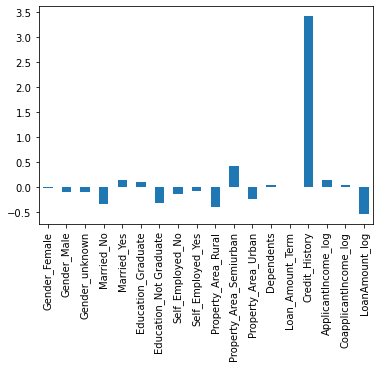

In [57]:
pd.Series(data = logistic_model.coef_[0],index=X.columns).plot(kind = "bar")

In [58]:
accuracy_score(y, logistic_model.predict(X))

0.806873977086743

In [59]:
confusion_matrix(y, logistic_model.predict(X))

array([[ 82, 110],
       [  8, 411]])

In [60]:
test_X = test.drop(columns="Loan_ID")

In [61]:
test_pred=logistic_model.predict(test_X)

In [62]:
sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [63]:
sample["Loan_Status"] = test_pred

In [64]:
test_pred.shape

(367,)

In [65]:
X.shape

(611, 18)

In [71]:
sample['Loan_Status'].replace({1:"Y",0:"N"}, inplace = True)

In [72]:
sample.to_csv("Loan_logistic.csv",index = False)

In [73]:
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
